<a href="https://colab.research.google.com/github/NityaVattam2002/Nitya_INFO5731_Fall2024/blob/main/Vattam_Nitya_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from google.colab import files

# Uploading the text files. I have two in my local drive.
uploaded = files.upload()

# Extracting file names from the uploaded files
train_file = list(uploaded.keys())[0]
test_file = list(uploaded.keys())[1]

# Defining a custom function to load data
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Splitting only on the first space to separate label and review
            label, review = line.strip().split(' ', 1)
            data.append((int(label), review))
    return pd.DataFrame(data, columns=["label", "review"])

# Loading the train and test data
train_data = load_data(train_file)
test_data = load_data(test_file)

# Checking for and removing missing values. The missing values can really disturb.
train_data = train_data.dropna(subset=["review"])
test_data = test_data.dropna(subset=["review"])

# Making sure all reviews are strings (am just doing a safety check)
train_data["review"] = train_data["review"].astype(str)
test_data["review"] = test_data["review"].astype(str)

# Splitting the training data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    train_data['review'], train_data['label'], test_size=0.2, random_state=42
)

# Vectorizing the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_data['review'])

# Initializing classifiers
classifiers = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Performing 10-fold cross-validation and evaluating each classifier
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in classifiers.items():
    # Performing 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train_vec, y_train)  # Training the model on the full training set

    # Making predictions on the validation and test sets
    y_val_pred = model.predict(X_val_vec)
    y_test_pred = model.predict(X_test_vec)

    # Calculating metrics on the validation set
    accuracy = accuracy_score(test_data['label'], y_test_pred)
    precision = precision_score(test_data['label'], y_test_pred)
    recall = recall_score(test_data['label'], y_test_pred)
    f1 = f1_score(test_data['label'], y_test_pred)

    # Storing the results
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

# Creating a DataFrame to display the results
metrics_df = pd.DataFrame(metrics)
print("Performance Evaluation of Models:")
print(metrics_df)


Saving stsa-test.txt to stsa-test (2).txt
Saving stsa-train.txt to stsa-train (1).txt


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:55:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:55:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:55:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:55:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:55:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Performance Evaluation of Models:
           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.741185   0.768685  0.720776  0.743960
1            SVM  0.660983   0.683828  0.651247  0.667140
2            KNN  0.553613   0.580376  0.521053  0.549117
3  Decision Tree  0.577457   0.607997  0.534903  0.569113
4  Random Forest  0.667919   0.711886  0.610526  0.657322
5        XGBoost  0.658092   0.684679  0.638781  0.660934


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [5]:
# Upgrading pip and installing the required packages. I must run this first before I run the one below; otherwise things
#wont work well.
!pip install --upgrade pip
!pip install -q sentence-transformers
!pip install -q -U scikit-learn
!pip install -q gensim
!pip install -q tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Saving yelp.csv to yelp (1).csv
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  

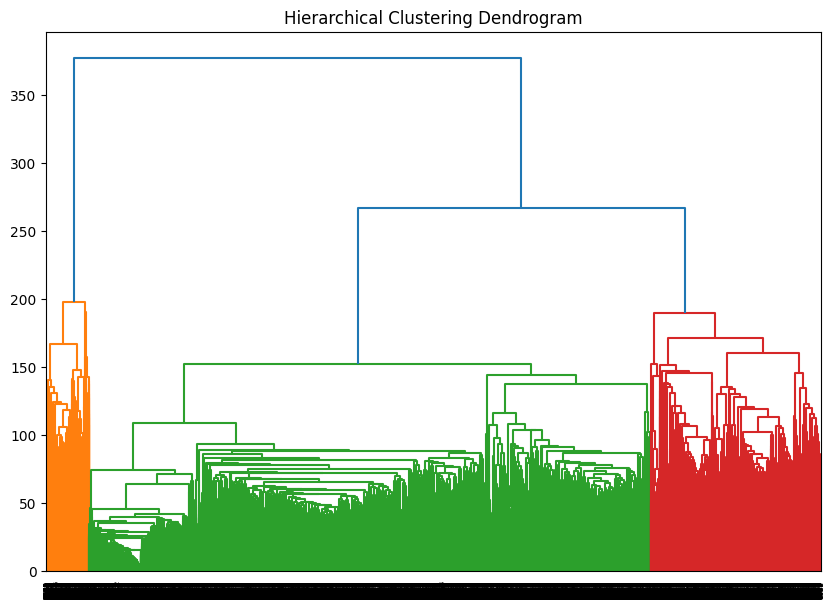

Hierarchical Clustering Silhouette Score: 0.14785438069252993
Word2Vec K-Means Silhouette Score: 0.08704952150583267


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BERT K-Means Silhouette Score: 0.020332040265202522


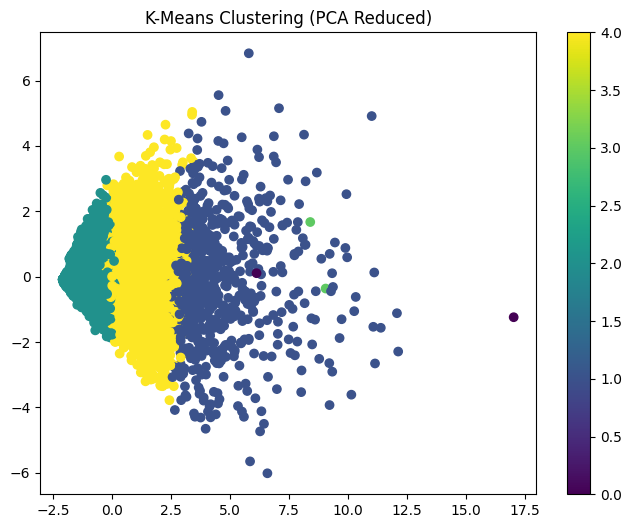

In [6]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import gensim
from gensim.models import Word2Vec
from google.colab import files

# Uploading yelp.csv file from local system. I downloaded it from Kaggle.com
uploaded = files.upload()

# Once uploaded, I will extract the file name
csv_file_path = list(uploaded.keys())[0]

# Loading the dataset
df = pd.read_csv(csv_file_path)

# Displaying first few rows to confirm it's loaded correctly
print(df.head())

# I have made sure that my dataset has a column 'text' for review content
text_data = df['text'].dropna()

# Preprocessing: Vectorizing text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text_data).toarray()

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# Evaluating K-means
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

# 2. DBSCAN Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Evaluating DBSCAN
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")

# 3. Hierarchical Clustering
linked = linkage(X_scaled, 'ward')

# Plotting a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Applying Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Evaluating Hierarchical Clustering
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical}")

# 4. Word2Vec Clustering
# Preprocessing text data for Word2Vec
tokenized_text = [text.split() for text in text_data]

# Training Word2Vec model
word2vec_model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv], axis=0) for words in tokenized_text]

# Applying K-Means to the word vectors
word2vec_kmeans = KMeans(n_clusters=5, random_state=42)
word2vec_labels = word2vec_kmeans.fit_predict(word_vectors)

# Evaluating Word2Vec KMeans
silhouette_word2vec = silhouette_score(word_vectors, word2vec_labels)
print(f"Word2Vec K-Means Silhouette Score: {silhouette_word2vec}")

# 5. BERT Clustering
# Loading pre-trained BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generating embeddings for the text data
embeddings = bert_model.encode(text_data.tolist(), convert_to_tensor=True)

# Applying K-Means on BERT embeddings
bert_kmeans = KMeans(n_clusters=5, random_state=42)
bert_labels = bert_kmeans.fit_predict(embeddings)

# Evaluating BERT KMeans
silhouette_bert = silhouette_score(embeddings, bert_labels)
print(f"BERT K-Means Silhouette Score: {silhouette_bert}")

# Results and Visualization
# Plotting the KMeans clustering (For BERT or Word2Vec, I also used PCA to reduce dimensions for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (PCA Reduced)")
plt.colorbar()
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

K-Means Silhouette Score: 0.11480731564431187
DBSCAN Silhouette Score: -0.357676543375062
Hierarchical Clustering Silhouette Score: 0.14785438069252993
Word2Vec K-Means Silhouette Score: 0.08724889159202576
BERT K-Means Silhouette Score: 0.020332040265202522


The clustering results show that none of the methods worked well, as indicated by the low Silhouette Scores, which measure how well the clusters match.

K-Means had the highest score at 0.1148, but it still indicates weak clustering.

DBSCAN struggled the most with a negative score of -0.3577, showing it couldn’t form meaningful clusters.

Hierarchical clustering performed slightly better with a score of 0.1479, but it was still not great.

 Word2Vec with K-Means scored 0.0872, slightly worse than K-Means alone, suggesting that using word vectors didn’t improve the results much.

 BERT-based K-Means had the lowest score at 0.0203, showing that even with advanced embeddings like BERT, the clustering didn’t work well.

 These results suggest that the dataset may not have clear clusters or that the methods used weren’t ideal for this type of data.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
This assignment was not a walk in the park. First of all, the first question required me to test various model
performance metrics. Getting things to run without errors was not easy particularly due to dependence on
existing libraries. The second question was even more technical as so much was expected of me. The dataset that was provided was
131 MBs long and this took a lot of time to even upload. I had to look for a smaller dataset; yelp.csv. Even
with that sorted, the errors were numerous. The warnigs are still there. The execution time for question two was very long; it took over 40 minutes to complete.
All in all, this was a great opportunity to interact and work with a real world datasets while using existing libraries
to perform various tasks. I look forward to more thrilling experiences like this.




'''

'\nThis assignment was not a walk in the park. First of all, the first question required me to test various model\nperformance metrics. Getting things to run without errors was not easy particularly due to dependence on\nexisting libraries. The second question was even more technical as so much was expected of me. The dataset that was provided was \n131 MBs long and this took a lot of time to even upload. I had to look for a smaller dataset; yelp.csv. Even\nwith that sorted, the errors were numerous. The warnigs are still there. The execution time for question two was very long; it took over 40 minutes to complete.\nAll in all, this was a great opportunity to interact and work with a real world datasets while using existing libraries\nto perform various tasks. I look forward to more thrilling experiences like this.\n\n\n\n\n'